<a href="https://colab.research.google.com/github/Sai-Nalla/NNDL/blob/main/icp11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step


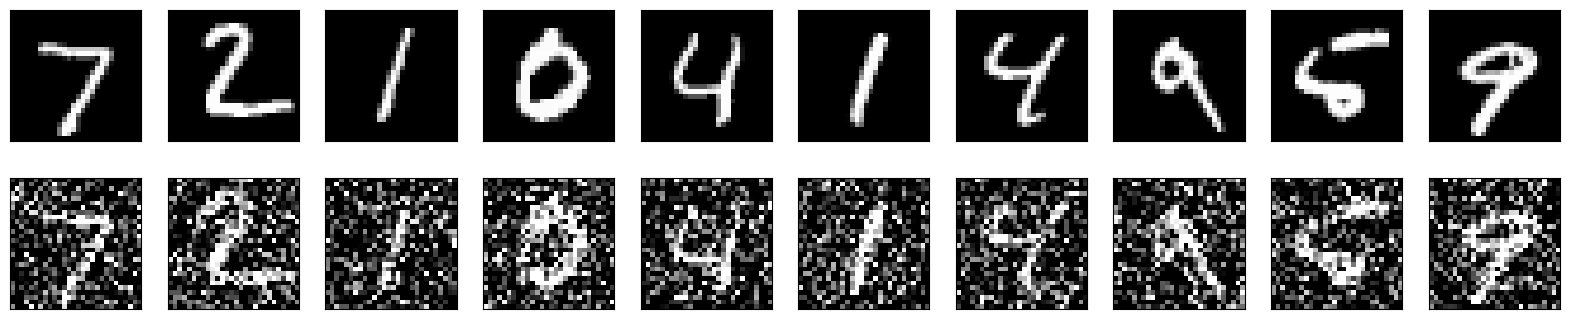

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Preprocess images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Introduce random noise
noise_factor = 0.5  # You can adjust this value to control the amount of noise
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip pixel values to [0, 1] range
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Optionally, visualize original and noisy images to inspect the noise
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [3]:
from tensorflow.keras import layers, models

def build_autoencoder(input_shape):
    # Encoder
    encoder_input = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_input)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    # Autoencoder model
    autoencoder = models.Model(encoder_input, decoded)
    return autoencoder

# Define input shape
input_shape = (28, 28, 1)

# Build autoencoder model
autoencoder = build_autoencoder(input_shape)

In [4]:
# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 [==============================] - 185s 392ms/step - loss: 0.1128 - val_loss: 0.1140
Epoch 2/10
469/469 [==============================] - 180s 383ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 3/10
469/469 [==============================] - 182s 387ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 4/10
469/469 [==============================] - 186s 397ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 5/10
469/469 [==============================] - 185s 395ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 6/10
469/469 [==============================] - 186s 396ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 7/10
469/469 [==============================] - 180s 383ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 8/10
469/469 [==============================] - 180s 383ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 9/10
469/469 [==============================] - 180s 384ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 10/10
469/469 [==============================] - 179s 382m

In [8]:
!pip install --upgrade tensorflow scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 25.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
     

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define a function to build the autoencoder model
def build_autoencoder(optimizer='adam'):
    autoencoder = build_autoencoder(input_shape)
    autoencoder.compile(optimizer=optimizer, loss='mean_squared_error')
    return autoencoder

# Create a KerasRegressor based on the build_autoencoder function
model = KerasRegressor(build_fn=build_autoencoder, verbose=0)

# Define hyperparameters to tune and their distributions
param_dist = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 30],
    'learning_rate': uniform(0.0001, 0.01)
}

# Perform random search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3)
random_result = random_search.fit(x_train_noisy, x_train)

# Print results
print("Best Parameters:", random_result.best_params_)
print("Best Score (Mean Squared Error):", random_result.best_score_)

NameError: name 'KerasRegressor' is not defined